## Final Project Submission

Please fill out:
* Student name: Deepali Sharma 
* Student pace: self paced / part time / full time   part time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


In [601]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#pd.set_option('display.max_rows', 10)
import warnings
warnings.filterwarnings("ignore")

In [403]:
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [404]:
from datetime import date
from datetime import datetime
df['date']=pd.to_datetime(df['date'])
df['yr_sold']=df['date'].dt.year.astype('int')

In [405]:
df['age'] =df['yr_sold']-df['yr_built']
df[['date','yr_built','yr_sold','age']]

,date,yr_built,yr_sold,age
0,2014-10-13,1955,2014,59
1,2014-12-09,1951,2014,63
2,2015-02-25,1933,2015,82
3,2014-12-09,1965,2014,49
4,2015-02-18,1987,2015,28
...,...,...,...,...
21592,2014-05-21,2009,2014,5
21593,2015-02-23,2014,2015,1
21594,2014-06-23,2009,2014,5
21595,2015-01-16,2004,2015,11


In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [407]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1852.0        1
1990.0        1
143.0         1
2190.0        1
4820.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [408]:
#pd.set_option('display.max_rows', 10)
df['sqft_basement'].replace(to_replace=['?'], value='-999',inplace=True)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])
df['sqft_basement'].value_counts()

 0.0       12826
-999.0       454
 600.0       217
 500.0       209
 700.0       208
           ...  
 266.0         1
 1930.0        1
 588.0         1
 1920.0        1
 65.0          1
Name: sqft_basement, Length: 304, dtype: int64

In [409]:
df['yr_renovated']=df['yr_renovated'].fillna(-1)

In [410]:
df['grade_val']=df['grade'].str.split(" ", n = 1, expand = True)[0]
df['grade_val']=df['grade_val'].astype(str).astype(int)

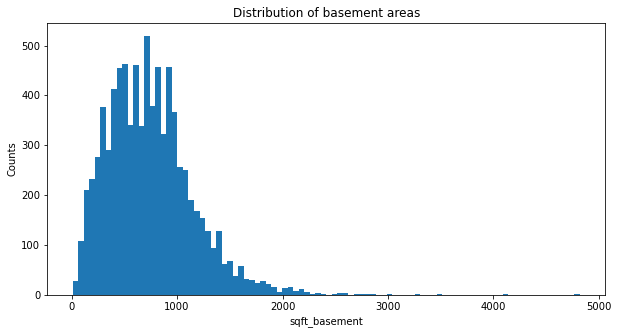

In [411]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df['sqft_basement'][df['sqft_basement']>0],bins='auto')

ax.set_xlabel("sqft_basement")
ax.set_ylabel("Counts")
ax.set_title("Distribution of basement areas");

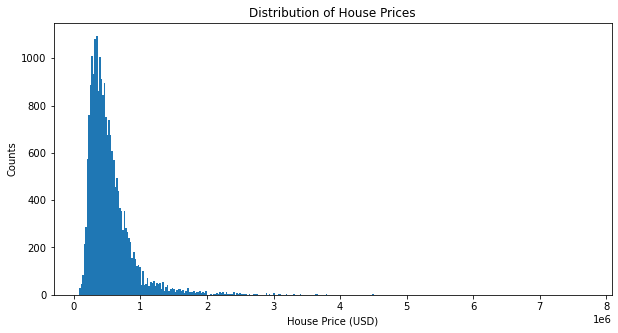

In [412]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df['price'],bins='auto')

ax.set_xlabel("House Price (USD)")
ax.set_ylabel("Counts")
ax.set_title("Distribution of House Prices");

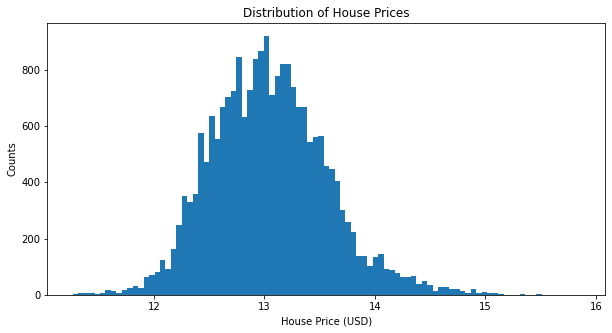

In [413]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(np.log(df['price']),bins='auto')

ax.set_xlabel("House Price (USD)")
ax.set_ylabel("Counts")
ax.set_title("Distribution of House Prices");

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [462]:
features_numeric     = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above',\
                        'sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15',\
                        'sqft_lot15','yr_sold','age','grade_val']
features_categorical = ['waterfront','view','condition','grade']

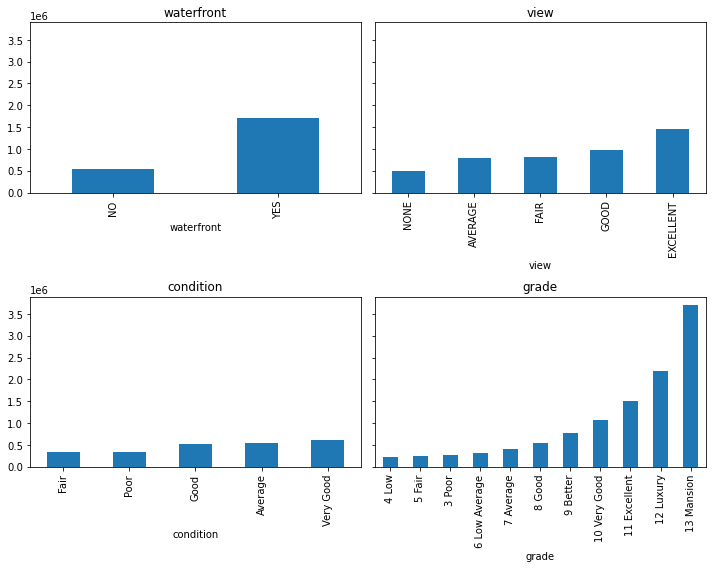

In [465]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8),sharey=True)

for col, ax in zip(features_categorical, axes.flatten()):
    (df.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

In [416]:
heatmap_data = df[features_numeric]
heatmap_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,age,grade_val
0,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59,7
1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63,7
2,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,-1.0,98028,47.7379,-122.233,2720,8062,2015,82,6
3,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49,7
4,510000.0,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2014,5,8
21593,400000.0,4,2.50,2310,5813,2.0,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2015,1,8
21594,402101.0,2,0.75,1020,1350,2.0,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2014,5,7
21595,400000.0,3,2.50,1600,2388,2.0,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,2015,11,8


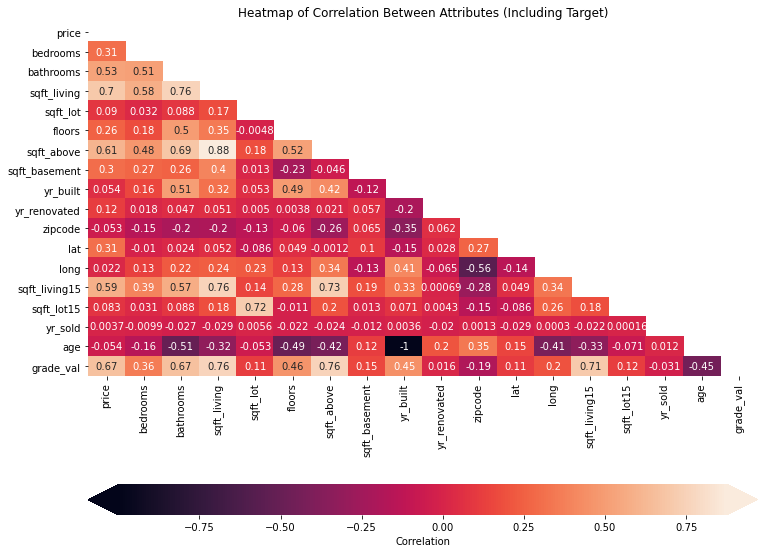

In [417]:
import seaborn as sns
import numpy as np

# Create a df with the target as the first column,
# then compute the correlation matrix
#heatmap_data = df[features_numeric]
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Based on the heatmap, the most correalated feature with price is "sqft_living". This will be my most correlated
feature and will be the baseline model. Also sqft_living15 and sqft_lot15 are strongly correlated
with sqft_living, sqft_lot respectively. I will therefore only include sqft_living, sqft_lot in my final model
Also between age and yr_built, I will use age. sqft_living and sqft_above are strongly correlated and therefore
I will skip sqft_above as well from the model.

In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [419]:
final_numeric=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_basement',\
               'yr_renovated','zipcode','lat','long','yr_sold','age','grade_val']
most_correlated_feature = 'sqft_living'

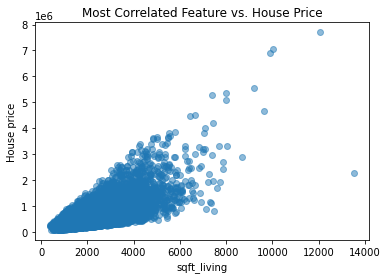

In [420]:
fig, ax = plt.subplots()

ax.scatter(df[most_correlated_feature], df['price'], alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("House price")
ax.set_title("Most Correlated Feature vs. House Price");

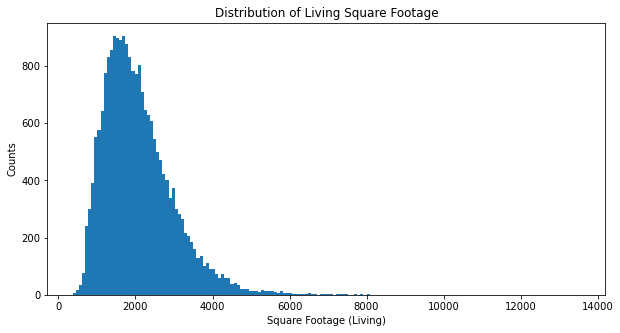

In [421]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df[most_correlated_feature],bins='auto')

ax.set_xlabel("Square Footage (Living)")
ax.set_ylabel("Counts")
ax.set_title("Distribution of Living Square Footage");

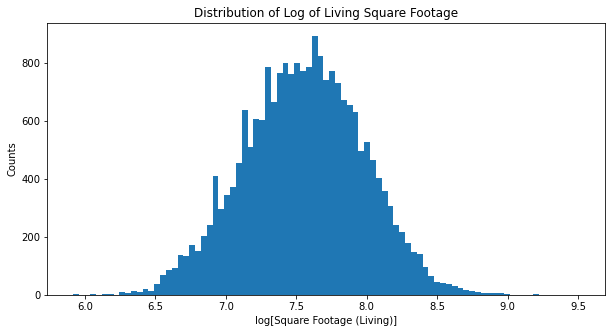

In [422]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(np.log(df[most_correlated_feature]),bins='auto')

ax.set_xlabel("log[Square Footage (Living)]")
ax.set_ylabel("Counts")
ax.set_title("Distribution of Log of Living Square Footage");

In [425]:
analyze_data['grade_val']

0        7
1        7
2        6
3        7
4        8
        ..
21592    8
21593    8
21594    7
21595    8
21596    7
Name: grade_val, Length: 21597, dtype: int64

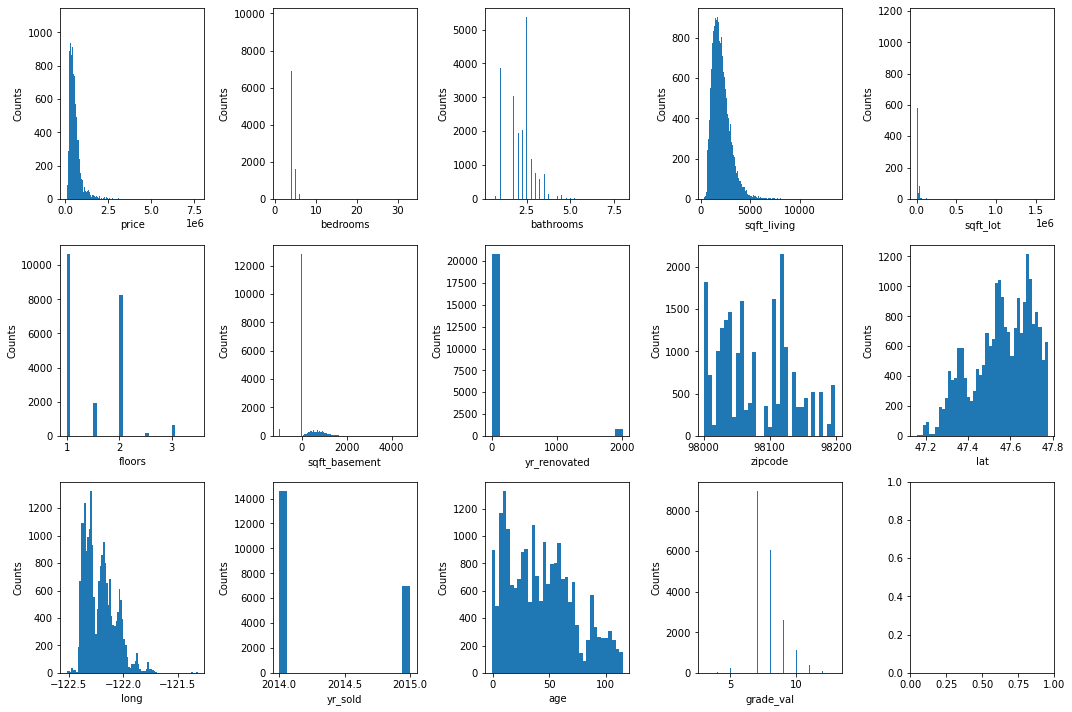

In [426]:
analyze_data=df[final_numeric]
fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(15, 10))
fig.set_tight_layout(True)

for index, col in enumerate(analyze_data.columns):
    ax = axes[index//5][index%5]
    ax.hist(analyze_data[col], bins='auto')
    ax.set_xlabel(col)
    ax.set_ylabel("Counts")

In [427]:
X = analyze_data.drop(columns='price')
y = df['price']

X_train , X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.25)

In [ ]:
#fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(15, 10))
#fig.set_tight_layout(True)

#for index, col in enumerate(analyze_data.columns):
 #   ax = axes[index//5][index%5]
  #  ax.scatter(X_train[col], y_train, alpha=0.2)
   # ax.set_xlabel(col)
    #ax.set_ylabel("listing price")

In [428]:
baseline_model = LinearRegression()

In [429]:
#linreg = LinearRegression().fit(X_train['sqft_living'], y_train)
linreg = LinearRegression().fit(X_train[[most_correlated_feature]], y_train)

In [430]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4895269677689762
Validation score: 0.4935530672243642


In [ ]:
data_log = analyze_data.drop(columns=['long','lat'])

In [ ]:
#log_names = [f'{column}_log' for column in data_log.columns]
#data_log = np.log(analyze_data)
#data_log.columns = log_names
data_log['sqft_basement'].replace(to_replace=0.0, value=1,inplace=True)
data_log['sqft_basement'].replace(to_replace=-999, value=2,inplace=True)

In [ ]:
data_log['yr_renovated'].replace(to_replace=0.0, value=1,inplace=True)
data_log['yr_renovated']=data_log['yr_renovated'].fillna(2)
data_log.yr_renovated.value_counts()

In [ ]:
data_log['age'].replace(to_replace=0, value=0.01,inplace=True)
data_log['age'].replace(to_replace=-1, value=0.001,inplace=True)
data_log['age'].value_counts()

In [ ]:
log_names = [f'{column}_log' for column in data_log.columns]
logdata = np.log(data_log)
logdata.columns = log_names
logdata

In [ ]:
#X = heatmap_data.drop(columns='price')
#y = df['price']

#X_train , X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.25)

In [431]:
baseline_model = LinearRegression()

In [432]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4895269677689762
Validation score: 0.4935530672243642


In [ ]:
XL = logdata.drop(columns='price_log')
yL = logdata['price_log']
X_log_train , X_log_test, y_log_train, y_log_test = train_test_split(XL,yL,random_state=42, test_size=0.25)

In [ ]:
#logdata[['sqft_living_log','price_log']]
most_correlated_feature_log ='sqft_living_log'

In [ ]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
second_model = LinearRegression()
log_baseline_scores = cross_validate(
    estimator=second_model,
    X=X_log_train[[most_correlated_feature_log]],
    y=y_log_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", log_baseline_scores["train_score"].mean())
print("Validation score:", log_baseline_scores["test_score"].mean())

In [ ]:
np.shape(X1_train)

In [ ]:
np.shape(y1_train)

In [ ]:
np.reshape(X1_train,(1,-1))

In [433]:

linreg = LinearRegression().fit(X_log_train[['sqft_living_log']], y_log_train)
#linreg = LinearRegression().fit(X_train_scaled, y_train)

In [434]:
lm_train_predictions = linreg.predict(X_log_train[['sqft_living_log']])

# Test set predictions 
lm_test_predictions = linreg.predict(X_log_test[['sqft_living_log']])

In [435]:
linreg.score(X_log_test[[most_correlated_feature_log]],y_log_test)

0.45641912249708183

In [436]:
linreg.score(X_log_train[[most_correlated_feature_log]],y_log_train)

0.45498814193077863

In [451]:
features_2     = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']
#X_train_second_model = X_train[['bedrooms','bathrooms','sqft_living','sqft_lot']]
X_train_second_model = X_train[features_2]

In [452]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.5070356688513252
Validation score: 0.5084814615079827

Baseline Model
Train score:      0.4895269677689762
Validation score: 0.4935530672243642


In [453]:
#final_numeric=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_basement',\
#               'yr_renovated','zipcode','lat','long','yr_sold','age']
features_3     = ['bedrooms','bathrooms','floors','age','sqft_basement','zipcode','sqft_living','sqft_lot',\
                 'yr_sold','yr_renovated']
X_train_third_model = X_train[features_3]

In [454]:
third_model = LinearRegression()

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)
print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.5603791473863141
Validation score: 0.5569183881240508

Second Model
Train score:      0.5070356688513252
Validation score: 0.5084814615079827

Baseline Model
Train score:      0.4895269677689762
Validation score: 0.4935530672243642


In [455]:
X_train_prelim = X_train[features_3]
X_test_prelim  = X_test[features_3]
prelim_model=LinearRegression()

In [456]:
# Fit the model on X_train_final and y_train
prelim_model.fit(X_train_prelim,y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
prelim_model.score(X_test_prelim, y_test)

0.5517333860020399

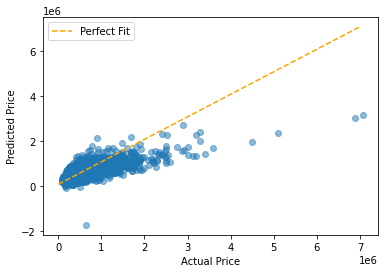

In [457]:
preds = prelim_model.predict(X_test_prelim)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

In [458]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, prelim_model.predict(X_test_prelim), squared=False)

247996.06784607048

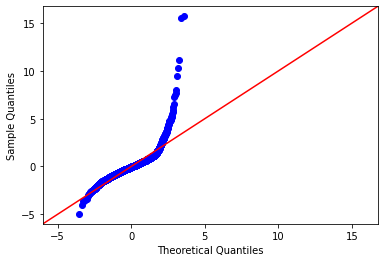

In [459]:
import scipy.stats as stats
import statsmodels.api as sm
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [602]:
final_features=['bedrooms','bathrooms','floors','age','sqft_basement','zipcode','sqft_living','sqft_lot',\
                 'yr_sold','yr_renovated','waterfront','view','condition']

In [603]:
X = df[final_features]
Y = df['price']
X_train , X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.25)

In [604]:
X_train["waterfront"].isna().sum()
X_train['waterfront']=df['waterfront'].fillna('NO')

In [605]:
X_train["view"].value_counts()

NONE         14585
AVERAGE        695
GOOD           378
EXCELLENT      245
FAIR           245
Name: view, dtype: int64

In [606]:
X_train["view"].isna().sum()
X_train["view"]=X_train["view"].fillna('UNKNOWN')

In [607]:
pd.set_option('display.max_rows', 100)
#X_train['waterfront'].value_counts()
X_train[(X_train["waterfront"].isna())
].head(100)


,bedrooms,bathrooms,floors,age,sqft_basement,zipcode,sqft_living,sqft_lot,yr_sold,yr_renovated,waterfront,view,condition


In [608]:
from sklearn.preprocessing import OrdinalEncoder

# (1) Create a variable street_train that contains the
# relevant column from X_train
# (Use double brackets [[]] to get the appropriate shape)
waterfront_train = X_train[["waterfront"]]

# (2) Instantiate an OrdinalEncoder
encoder_waterfront = OrdinalEncoder()

# (3) Fit the encoder on street_train
encoder_waterfront.fit(waterfront_train)
#encoder_waterfront.fit_transform(waterfront_train.dropna().values.reshape(-1,1))

# Inspect the categories of the fitted encoder
encoder_waterfront.categories_[0]

#oe = preprocessing.OrdinalEncoder()
#x.loc[x.job.notna(), ['job']] = oe.fit_transform(x["job"].dropna().values.reshape(-1,1))
#x['job'] = x.job.fillna(-1)


array(['NO', 'YES'], dtype=object)

In [609]:
# (4) Transform frontage_missing_train using the encoder and
# assign the result to frontage_missing_encoded_train
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)

# Flatten for appropriate shape
waterfront_encoded_train = waterfront_encoded_train.flatten()

# Visually inspect frontage_missing_encoded_train
waterfront_encoded_train

array([0., 0., 0., ..., 0., 0., 0.])

In [610]:
X_train["waterfront"] = waterfront_encoded_train

# Visually inspect X_train
X_train['waterfront'].value_counts()

0.0    16086
1.0      111
Name: waterfront, dtype: int64

In [611]:
X_train

,bedrooms,bathrooms,floors,age,sqft_basement,zipcode,sqft_living,sqft_lot,yr_sold,yr_renovated,waterfront,view,condition
6405,3,2.50,2.0,22,0.0,98029,1880,4499,2015,0.0,0.0,NONE,Average
937,3,2.50,1.0,20,710.0,98042,2020,6564,2014,0.0,0.0,NONE,Average
19076,5,4.00,2.0,40,760.0,98027,4720,493534,2015,0.0,0.0,NONE,Very Good
15201,2,2.00,1.0,66,0.0,98117,1430,3880,2015,0.0,0.0,NONE,Good
13083,3,2.25,1.0,34,530.0,98042,2270,32112,2014,0.0,0.0,NONE,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,2.50,2.0,10,0.0,98065,2230,5800,2014,0.0,0.0,NONE,Average
21575,4,2.75,2.0,0,0.0,98178,2770,3852,2014,-1.0,0.0,NONE,Average
5390,4,1.50,1.0,38,0.0,98014,1530,9000,2014,0.0,0.0,NONE,Good
860,1,0.75,1.0,51,0.0,98168,380,15000,2014,0.0,0.0,NONE,Average


In [612]:
from sklearn.preprocessing import OneHotEncoder

# (1) Create a variable fireplace_qu_train
# extracted from X_train
# (double brackets due to shape expected by OHE)
view_train = X_train[["view"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

# (3) Fit the encoder on fireplace_qu_train
ohe.fit(view_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE', 'UNKNOWN'],
       dtype=object)]

In [613]:
view_encoded_train = ohe.transform(view_train)

# Visually inspect fireplace_qu_encoded_train
view_encoded_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [614]:
# (5a) Make the transformed data into a dataframe
view_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    view_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Visually inspect new dataframe
view_encoded_train

,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN
6405,0.0,0.0,0.0,0.0,1.0,0.0
937,0.0,0.0,0.0,0.0,1.0,0.0
19076,0.0,0.0,0.0,0.0,1.0,0.0
15201,0.0,0.0,0.0,0.0,1.0,0.0
13083,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
11964,0.0,0.0,0.0,0.0,1.0,0.0
21575,0.0,0.0,0.0,0.0,1.0,0.0
5390,0.0,0.0,0.0,0.0,1.0,0.0
860,0.0,0.0,0.0,0.0,1.0,0.0


In [615]:
X_train.drop("view", axis=1, inplace=True)
#X_train = pd.concat([X_train,view_encoded_train], axis=1),
X_train

,bedrooms,bathrooms,floors,age,sqft_basement,zipcode,sqft_living,sqft_lot,yr_sold,yr_renovated,waterfront,condition
6405,3,2.50,2.0,22,0.0,98029,1880,4499,2015,0.0,0.0,Average
937,3,2.50,1.0,20,710.0,98042,2020,6564,2014,0.0,0.0,Average
19076,5,4.00,2.0,40,760.0,98027,4720,493534,2015,0.0,0.0,Very Good
15201,2,2.00,1.0,66,0.0,98117,1430,3880,2015,0.0,0.0,Good
13083,3,2.25,1.0,34,530.0,98042,2270,32112,2014,0.0,0.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,2.50,2.0,10,0.0,98065,2230,5800,2014,0.0,0.0,Average
21575,4,2.75,2.0,0,0.0,98178,2770,3852,2014,-1.0,0.0,Average
5390,4,1.50,1.0,38,0.0,98014,1530,9000,2014,0.0,0.0,Good
860,1,0.75,1.0,51,0.0,98168,380,15000,2014,0.0,0.0,Average


In [616]:
#X_train = pd.concat([X_train,view_encoded_train], axis=1)
X_train = pd.concat([X_train, view_encoded_train], axis=1)
X_train

,bedrooms,bathrooms,floors,age,sqft_basement,zipcode,sqft_living,sqft_lot,yr_sold,yr_renovated,waterfront,condition,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN
6405,3,2.50,2.0,22,0.0,98029,1880,4499,2015,0.0,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0
937,3,2.50,1.0,20,710.0,98042,2020,6564,2014,0.0,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0
19076,5,4.00,2.0,40,760.0,98027,4720,493534,2015,0.0,0.0,Very Good,0.0,0.0,0.0,0.0,1.0,0.0
15201,2,2.00,1.0,66,0.0,98117,1430,3880,2015,0.0,0.0,Good,0.0,0.0,0.0,0.0,1.0,0.0
13083,3,2.25,1.0,34,530.0,98042,2270,32112,2014,0.0,0.0,Good,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,2.50,2.0,10,0.0,98065,2230,5800,2014,0.0,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0
21575,4,2.75,2.0,0,0.0,98178,2770,3852,2014,-1.0,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0
5390,4,1.50,1.0,38,0.0,98014,1530,9000,2014,0.0,0.0,Good,0.0,0.0,0.0,0.0,1.0,0.0
860,1,0.75,1.0,51,0.0,98168,380,15000,2014,0.0,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0


In [617]:
X_train["condition"].isna().sum()

0

In [618]:
X_train["condition"].value_counts()

Average      10525
Good          4238
Very Good     1287
Fair           129
Poor            18
Name: condition, dtype: int64

In [619]:
condition_train = X_train[["condition"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe1 = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

# (3) Fit the encoder on fireplace_qu_train
ohe1.fit(condition_train)

# Inspect the categories of the fitted encoder
ohe1.categories_

[array(['Average', 'Fair', 'Good', 'Poor', 'Very Good'], dtype=object)]

In [620]:
condition_encoded_train = ohe1.transform(condition_train)

# Visually inspect fireplace_qu_encoded_train
condition_encoded_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [621]:
condition_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    condition_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe1.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Visually inspect new dataframe
condition_encoded_train

,Average,Fair,Good,Poor,Very Good
6405,1.0,0.0,0.0,0.0,0.0
937,1.0,0.0,0.0,0.0,0.0
19076,0.0,0.0,0.0,0.0,1.0
15201,0.0,0.0,1.0,0.0,0.0
13083,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
11964,1.0,0.0,0.0,0.0,0.0
21575,1.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,1.0,0.0,0.0
860,1.0,0.0,0.0,0.0,0.0


In [622]:
X_train.drop("condition", axis=1, inplace=True)
X_train

,bedrooms,bathrooms,floors,age,sqft_basement,zipcode,sqft_living,sqft_lot,yr_sold,yr_renovated,waterfront,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN
6405,3,2.50,2.0,22,0.0,98029,1880,4499,2015,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
937,3,2.50,1.0,20,710.0,98042,2020,6564,2014,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19076,5,4.00,2.0,40,760.0,98027,4720,493534,2015,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15201,2,2.00,1.0,66,0.0,98117,1430,3880,2015,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13083,3,2.25,1.0,34,530.0,98042,2270,32112,2014,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,2.50,2.0,10,0.0,98065,2230,5800,2014,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21575,4,2.75,2.0,0,0.0,98178,2770,3852,2014,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5390,4,1.50,1.0,38,0.0,98014,1530,9000,2014,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
860,1,0.75,1.0,51,0.0,98168,380,15000,2014,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [623]:
X_train = pd.concat([X_train, condition_encoded_train], axis=1)
X_train

,bedrooms,bathrooms,floors,age,sqft_basement,zipcode,sqft_living,sqft_lot,yr_sold,yr_renovated,...,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN,Average,Fair,Good,Poor,Very Good
6405,3,2.50,2.0,22,0.0,98029,1880,4499,2015,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
937,3,2.50,1.0,20,710.0,98042,2020,6564,2014,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
19076,5,4.00,2.0,40,760.0,98027,4720,493534,2015,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15201,2,2.00,1.0,66,0.0,98117,1430,3880,2015,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
13083,3,2.25,1.0,34,530.0,98042,2270,32112,2014,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,2.50,2.0,10,0.0,98065,2230,5800,2014,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21575,4,2.75,2.0,0,0.0,98178,2770,3852,2014,-1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5390,4,1.50,1.0,38,0.0,98014,1530,9000,2014,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
860,1,0.75,1.0,51,0.0,98168,380,15000,2014,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [624]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       16197 non-null  int64  
 1   bathrooms      16197 non-null  float64
 2   floors         16197 non-null  float64
 3   age            16197 non-null  int64  
 4   sqft_basement  16197 non-null  float64
 5   zipcode        16197 non-null  int64  
 6   sqft_living    16197 non-null  int64  
 7   sqft_lot       16197 non-null  int64  
 8   yr_sold        16197 non-null  int64  
 9   yr_renovated   16197 non-null  float64
 10  waterfront     16197 non-null  float64
 11  AVERAGE        16197 non-null  float64
 12  EXCELLENT      16197 non-null  float64
 13  FAIR           16197 non-null  float64
 14  GOOD           16197 non-null  float64
 15  NONE           16197 non-null  float64
 16  UNKNOWN        16197 non-null  float64
 17  Average        16197 non-null  float64
 18  Fai

In [625]:
# Replace NaNs with "N/A"s
X_test['waterfront'] = X_test['waterfront'].fillna('NO')
X_test["view"]       = X_test["view"].fillna('UNKNOWN')

In [626]:
waterfront_test = X_test[["waterfront"]]
waterfront_encoded_test = encoder_waterfront.transform(waterfront_test).flatten()
X_test["waterfront"] = waterfront_encoded_test

In [627]:
X_test

,bedrooms,bathrooms,floors,age,sqft_basement,zipcode,sqft_living,sqft_lot,yr_sold,yr_renovated,waterfront,view,condition
3686,3,0.75,1.0,70,250.0,98146,850,8573,2015,0.0,0.0,NONE,Average
10247,3,1.00,1.0,74,650.0,98115,1510,6083,2014,0.0,0.0,NONE,Good
4037,4,2.25,1.0,32,620.0,98045,1790,42000,2015,0.0,0.0,NONE,Average
3437,2,1.50,1.0,27,510.0,98106,1140,2500,2015,-1.0,0.0,FAIR,Average
19291,3,1.00,1.0,67,500.0,98107,1500,3920,2014,0.0,0.0,NONE,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18276,5,1.00,1.0,70,370.0,98125,1170,6757,2014,0.0,0.0,NONE,Good
15003,3,1.75,1.0,61,680.0,98144,1670,5100,2015,0.0,0.0,AVERAGE,Very Good
13478,4,2.25,2.0,108,900.0,98112,3260,4640,2015,0.0,0.0,NONE,Very Good
18399,4,5.00,2.0,22,2070.0,98042,5820,13906,2015,0.0,0.0,NONE,Average


In [628]:
view_test = X_test[["view"]]
view_encoded_test = ohe.transform(view_test)
view_encoded_test = pd.DataFrame(
    view_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("view", axis=1, inplace=True)
X_test = pd.concat([X_test, view_encoded_test], axis=1)

# Visually inspect X_test
X_test

,bedrooms,bathrooms,floors,age,sqft_basement,zipcode,sqft_living,sqft_lot,yr_sold,yr_renovated,waterfront,condition,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN
3686,3,0.75,1.0,70,250.0,98146,850,8573,2015,0.0,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0
10247,3,1.00,1.0,74,650.0,98115,1510,6083,2014,0.0,0.0,Good,0.0,0.0,0.0,0.0,1.0,0.0
4037,4,2.25,1.0,32,620.0,98045,1790,42000,2015,0.0,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0
3437,2,1.50,1.0,27,510.0,98106,1140,2500,2015,-1.0,0.0,Average,0.0,0.0,1.0,0.0,0.0,0.0
19291,3,1.00,1.0,67,500.0,98107,1500,3920,2014,0.0,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18276,5,1.00,1.0,70,370.0,98125,1170,6757,2014,0.0,0.0,Good,0.0,0.0,0.0,0.0,1.0,0.0
15003,3,1.75,1.0,61,680.0,98144,1670,5100,2015,0.0,0.0,Very Good,1.0,0.0,0.0,0.0,0.0,0.0
13478,4,2.25,2.0,108,900.0,98112,3260,4640,2015,0.0,0.0,Very Good,0.0,0.0,0.0,0.0,1.0,0.0
18399,4,5.00,2.0,22,2070.0,98042,5820,13906,2015,0.0,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0


In [629]:
condition_test = X_test[["condition"]]
condition_encoded_test = ohe1.transform(condition_test)
condition_encoded_test = pd.DataFrame(
    condition_encoded_test,
    columns=ohe1.categories_[0],
    index=X_test.index
)
X_test.drop("condition", axis=1, inplace=True)
X_test = pd.concat([X_test, condition_encoded_test], axis=1)

# Visually inspect X_test
X_test

,bedrooms,bathrooms,floors,age,sqft_basement,zipcode,sqft_living,sqft_lot,yr_sold,yr_renovated,...,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN,Average,Fair,Good,Poor,Very Good
3686,3,0.75,1.0,70,250.0,98146,850,8573,2015,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
10247,3,1.00,1.0,74,650.0,98115,1510,6083,2014,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4037,4,2.25,1.0,32,620.0,98045,1790,42000,2015,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3437,2,1.50,1.0,27,510.0,98106,1140,2500,2015,-1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19291,3,1.00,1.0,67,500.0,98107,1500,3920,2014,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18276,5,1.00,1.0,70,370.0,98125,1170,6757,2014,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
15003,3,1.75,1.0,61,680.0,98144,1670,5100,2015,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13478,4,2.25,2.0,108,900.0,98112,3260,4640,2015,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
18399,4,5.00,2.0,22,2070.0,98042,5820,13906,2015,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [630]:
combined_model = LinearRegression()
combined_model.fit(X_train, y_train)

LinearRegression()

In [632]:
combined_model.score(X_test, y_test)

0.5923623692818885

In [634]:
combined_model_scores = cross_validate(
    estimator=combined_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)
print("Combined Model")
print("Train score:     ", combined_model_scores["train_score"].mean())
print("Validation score:", combined_model_scores["test_score"].mean())
print()
print("Third Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Combined Model
Train score:      0.6066857404155982
Validation score: 0.5972204777553954

Third Model
Train score:      0.5603791473863141
Validation score: 0.5569183881240508

Second Model
Train score:      0.5070356688513252
Validation score: 0.5084814615079827

Baseline Model
Train score:      0.4895269677689762
Validation score: 0.4935530672243642


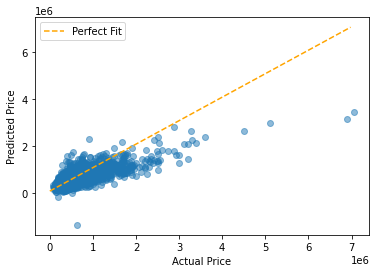

In [635]:
preds = combined_model.predict(X_test)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

In [636]:
mean_squared_error(y_test, combined_model.predict(X_test), squared=False)

236490.51761799754

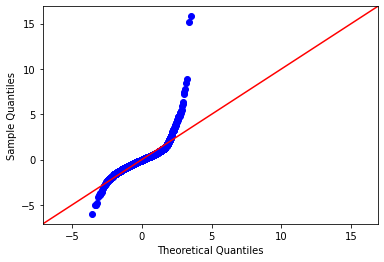

In [637]:
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [644]:
import statsmodels.api as sm

smodel=sm.OLS(y_train, sm.add_constant(X_train)).fit()
smodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     1374.
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:20:11   Log-Likelihood:            -2.2297e+05
No. Observations:               16197   AIC:                         4.460e+05
Df Residuals:                   16178   BIC:                         4.461e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.494e+07   5.73e+06     -6.101      0.000   -4.62e+07   -2.37e+07
bedrooms      -6.077e+04   2568.327    -23.662      0.000   -6.58e+04   -5.57e+04
bathrooms      6.487e+04   4285.458     15.138      0.000    5.65e+04    7.33e+04
floors         5.385e+04   4509.581     11.940      0.000     4.5e+04    6.27e+04
age            2982.3480     81.659     36.522      0.000    2822.288    3142.408
sqft_basement   -23.2213      4.770     -4.868      0.000     -32.571     -13.872
sqft_living     280.4619      3.544     79.138      0.000     273.515     287.408
sqft_lot         -0.3745      0.046     -8.169      0.000      -0.464      -0.285
yr_sold        2.366e+04   3885.496      6.090      0.000     1.6e+04    3.13e+04
waterfront     5.012e+05   2.67e+04     18.756      0.000    4.49e+05    5.54e+05
AVERAGE       -5.873e+06   9.54e+05     -6.154      0.000   -7.74e+06      -4e+06
EXCELLENT     -5.612e+06   9.55e+05     -5.879      0.000   -7.48e+06   -3.74e+06
FAIR          -5.813e+06   9.55e+05     -6.090      0.000   -7.68e+06   -3.94e+06
GOOD          -5.785e+06   9.54e+05     -6.061      0.000   -7.66e+06   -3.91e+06
NONE          -5.953e+06   9.54e+05     -6.238      0.000   -7.82e+06   -4.08e+06
UNKNOWN       -5.904e+06   9.55e+05     -6.180      0.000   -7.78e+06   -4.03e+06
Average       -6.969e+06   1.15e+06     -6.084      0.000   -9.21e+06   -4.72e+06
Fair           -7.01e+06   1.15e+06     -6.118      0.000   -9.26e+06   -4.76e+06
Good          -6.957e+06   1.15e+06     -6.074      0.000    -9.2e+06   -4.71e+06
Poor           -7.08e+06   1.15e+06     -6.178      0.000   -9.33e+06   -4.83e+06
Very Good     -6.923e+06   1.15e+06     -6.046      0.000   -9.17e+06   -4.68e+06
==============================================================================
Omnibus:                     9485.778   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           290412.780
Skew:                           2.278   Prob(JB):                         0.00
Kurtosis:                      23.238   Cond. No.                     2.12e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.81e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [640]:
# Run this cell without changes

from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
floors: True
age: True
sqft_basement: True
zipcode: False
sqft_living: True
sqft_lot: True
yr_sold: True
yr_renovated: False
waterfront: True
AVERAGE: True
EXCELLENT: True
FAIR: True
GOOD: True
NONE: True
UNKNOWN: True
Average: True
Fair: True
Good: True
Poor: True
Very Good: True


In [641]:
X_train.drop(columns=["yr_renovated","zipcode"], axis=1, inplace=True)
X_train

,bedrooms,bathrooms,floors,age,sqft_basement,sqft_living,sqft_lot,yr_sold,waterfront,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN,Average,Fair,Good,Poor,Very Good
6405,3,2.50,2.0,22,0.0,1880,4499,2015,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
937,3,2.50,1.0,20,710.0,2020,6564,2014,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
19076,5,4.00,2.0,40,760.0,4720,493534,2015,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15201,2,2.00,1.0,66,0.0,1430,3880,2015,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
13083,3,2.25,1.0,34,530.0,2270,32112,2014,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,2.50,2.0,10,0.0,2230,5800,2014,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21575,4,2.75,2.0,0,0.0,2770,3852,2014,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5390,4,1.50,1.0,38,0.0,1530,9000,2014,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
860,1,0.75,1.0,51,0.0,380,15000,2014,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [642]:
final_model=LinearRegression()
final_model_scores = cross_validate(
    estimator=final_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)
print("Final Model")
print("Train score:     ", final_model_scores["train_score"].mean())
print("Validation score:", final_model_scores["test_score"].mean())
print()
print("Combined Model")
print("Train score:     ", combined_model_scores["train_score"].mean())
print("Validation score:", combined_model_scores["test_score"].mean())
print()
print("Third Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Final Model
Train score:      0.6064693301948224
Validation score: 0.597267515043785

Combined Model
Train score:      0.6066857404155982
Validation score: 0.5972204777553954

Third Model
Train score:      0.5603791473863141
Validation score: 0.5569183881240508

Second Model
Train score:      0.5070356688513252
Validation score: 0.5084814615079827

Baseline Model
Train score:      0.4895269677689762
Validation score: 0.4935530672243642


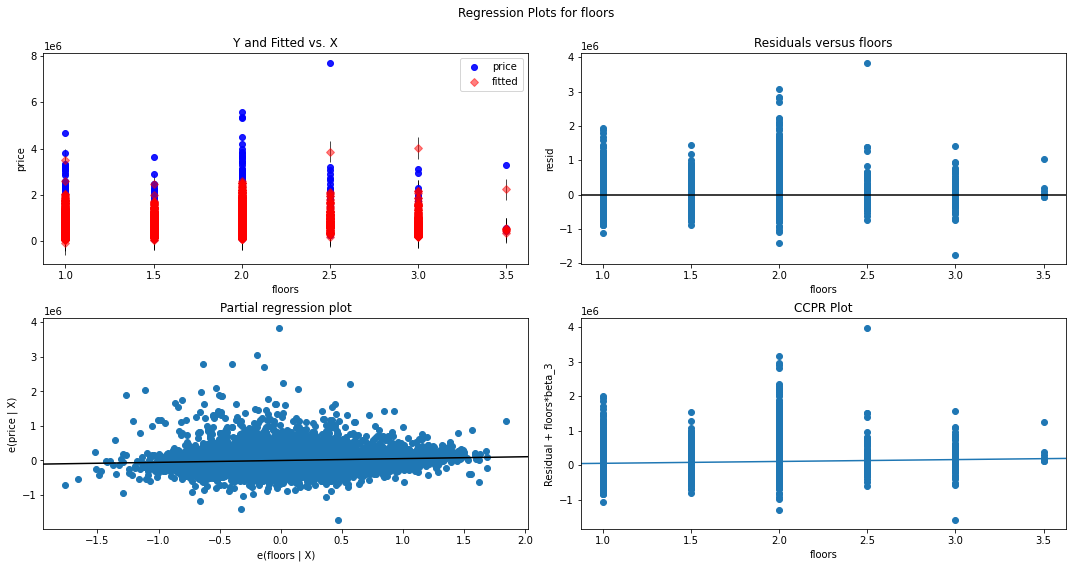

In [649]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(smodel, "floors", fig=fig)
plt.show()